In [ ]:
from google.colab import files
uploaded = files.upload()
import numpy as np
import pandas as pd
happy = pd.read_csv("happy.csv")
happy

Saving happy.csv to happy (3).csv


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [ ]:
# Размерность, пропуски типы данных

happy.info(memory_usage='deep')

# нужно преобразовать "country", "region", "country.1"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 29.7 KB


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(happy['country'])
happy['country'] = label_encoder.transform(happy['country'])

label_encoder.fit(happy['country.1'])
happy['country.1'] = label_encoder.transform(happy['country.1'])

label_encoder.fit(happy['region'])
happy['region'] = label_encoder.transform(happy['region'])

happy.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,2,37.0,4.9,2.42,2096.76,1731.506667,31.445556,1,4.350,0.76821,2
1,0,26.0,4.3,3.19,1448.88,1044.240000,42.720000,8,4.033,0.75778,0
2,1,60.0,7.1,1.91,7101.12,5109.400000,45.475556,3,6.574,1.05351,1
3,4,59.0,7.2,2.11,19457.04,16879.620000,30.296250,9,7.200,1.33723,4
4,3,65.0,7.6,1.80,19917.00,15846.060000,35.285000,0,7.284,1.33358,3


In [34]:
x = happy[['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'GDP', 'country.1']].values
y = happy ['happyScore'].values

features = pd.Series(['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'GDP', 'country.1'])

features

0                  country
1    adjusted_satisfaction
2         avg_satisfaction
3         std_satisfaction
4               avg_income
5            median_income
6        income_inequality
7                   region
8                      GDP
9                country.1
dtype: object

In [35]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x, y)

coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,0.000400,country
1,0.045212,adjusted_satisfaction
2,0.134180,avg_satisfaction
3,-0.067158,std_satisfaction
4,0.000133,avg_income
5,-0.000089,median_income
6,-0.000801,income_inequality
7,-0.035675,region
8,0.099144,GDP
9,0.000400,country.1


In [37]:
x = happy[['avg_satisfaction']].values
y = happy['happyScore'].values
slr = LinearRegression()
slr.fit(x, y)
y_pred = slr.predict(x)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [0.77129154]
Intercept: 0.842800698183142


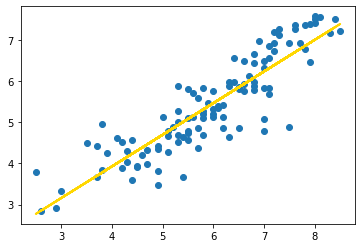

In [41]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

# визуализация графика регрессии и графика данных

plt.plot(x, slr.predict(x), color='gold', linewidth=2)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 0.297
